<a href="https://colab.research.google.com/github/smlra-kjsce/Reinforcement-Learning/blob/main/Reinforcement-Learning/Q-Learning/Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step # 1 : Import required libraries.



In [ ]:
!pip install gym==0.21.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 7.5 MB/s 
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616828 sha256=c70fe9e611b77f6e063a76f34b8bf3d5c03ca31509473a6493929b7acb6a5824
  Stored in directory: /root/.cache/pip/wheels/76/ee/9c/36bfe3e079df99acf5ae57f4e3464ff2771b34447d6d2f2148
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


In [7]:
import gym
import itertools
import matplotlib
import matplotlib.style
import numpy as np
import pandas as pd
import sys


from collections import defaultdict
from windy_gridworld import WindyGridworldEnv
import plotting

matplotlib.style.use('ggplot')


Step #2 : Create gym environment.

In [ ]:
env = WindyGridworldEnv()


Step #3 : Make the $\epsilon$-greedy policy.



In [ ]:
def createEpsilonGreedyPolicy(Q, epsilon, num_actions):
	"""
	Creates an epsilon-greedy policy based
	on a given Q-function and epsilon.
	
	Returns a function that takes the state
	as an input and returns the probabilities
	for each action in the form of a numpy array
	of length of the action space(set of possible actions).
	"""
	def policyFunction(state):

		Action_probabilities = np.ones(num_actions,
				dtype = float) * epsilon / num_actions
				
		best_action = np.argmax(Q[state])
		Action_probabilities[best_action] += (1.0 - epsilon)
		return Action_probabilities

	return policyFunction


Step #4 : Build Q-Learning Model.



In [ ]:
def qLearning(env, num_episodes, discount_factor = 1.0,
							alpha = 0.6, epsilon = 0.1):
	"""
	Q-Learning algorithm: Off-policy TD control.
	Finds the optimal greedy policy while improving
	following an epsilon-greedy policy"""
	
	# Action value function
	# A nested dictionary that maps
	# state -> (action -> action-value).
	Q = defaultdict(lambda: np.zeros(env.action_space.n))

	# Keeps track of useful statistics
	stats = plotting.EpisodeStats(
		episode_lengths = np.zeros(num_episodes),
		episode_rewards = np.zeros(num_episodes))	
	
	# Create an epsilon greedy policy function
	# appropriately for environment action space
	policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n)
	
	# For every episode
	for ith_episode in range(num_episodes):
		
		# Reset the environment and pick the first action
		state = env.reset()
		
		for t in itertools.count():
			
			# get probabilities of all actions from current state
			action_probabilities = policy(state)

			# choose action according to
			# the probability distribution
			action = np.random.choice(np.arange(
					len(action_probabilities)),
					p = action_probabilities)

			# take action and get reward, transit to next state
			next_state, reward, done, _ = env.step(action)

			# Update statistics
			stats.episode_rewards[ith_episode] += reward
			stats.episode_lengths[ith_episode] = t
			
			# TD Update
			best_next_action = np.argmax(Q[next_state])	
			td_target = reward + discount_factor * Q[next_state][best_next_action]
			td_delta = td_target - Q[state][action]
			Q[state][action] += alpha * td_delta

			# done is True if episode terminated
			if done:
				break
				
			state = next_state
	
	return Q, stats


Step #5 : Train the model.



In [ ]:
Q, stats = qLearning(env, 1000)


Step #6 : Plot important statistics.



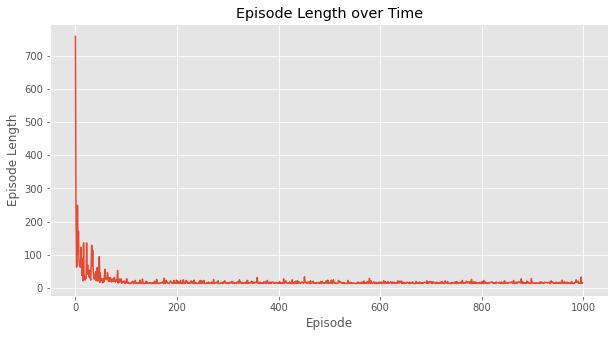

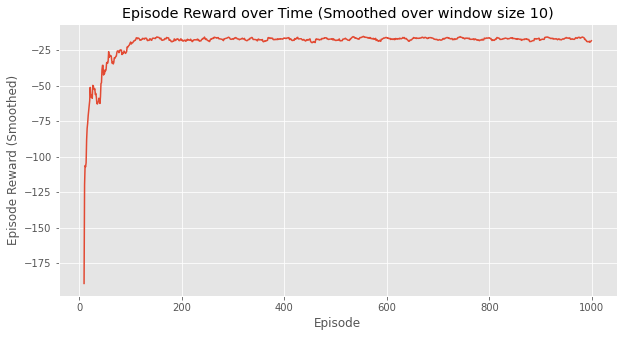

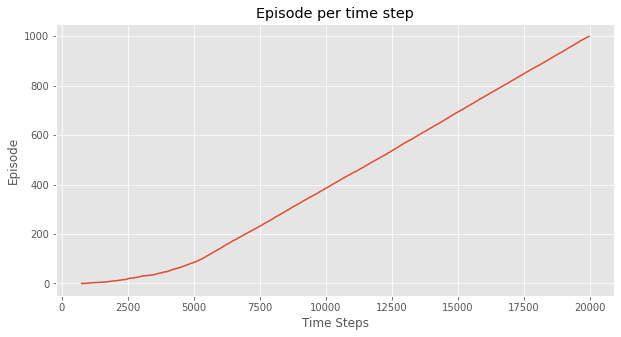

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [ ]:
plotting.plot_episode_stats(stats)
